In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import ipywidgets as widgets
from IPython.display import display


In [39]:
import pandas as pd

# Load the dataset from the Final Datasets folder
file_path = 'Final Datasets/N1_Cleaned_fueldata.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information
data_info = data.info()
data_head = data.head()

data_info, data_head


# Putting data into another variable
data_cleaned = data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972174 entries, 0 to 972173
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PUBLISH_DATE         972174 non-null  object 
 1   TRADING_NAME         972174 non-null  object 
 2   BRAND_DESCRIPTION    972174 non-null  object 
 3   PRODUCT_DESCRIPTION  972174 non-null  object 
 4   PRODUCT_PRICE        972174 non-null  float64
 5   ADDRESS              972174 non-null  object 
 6   LOCATION             972174 non-null  object 
 7   POSTCODE             972174 non-null  int64  
 8   AREA_DESCRIPTION     972174 non-null  object 
 9   REGION_DESCRIPTION   972174 non-null  object 
 10  latitude             972174 non-null  float64
 11  longitude            972174 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 89.0+ MB


# Daily Trend

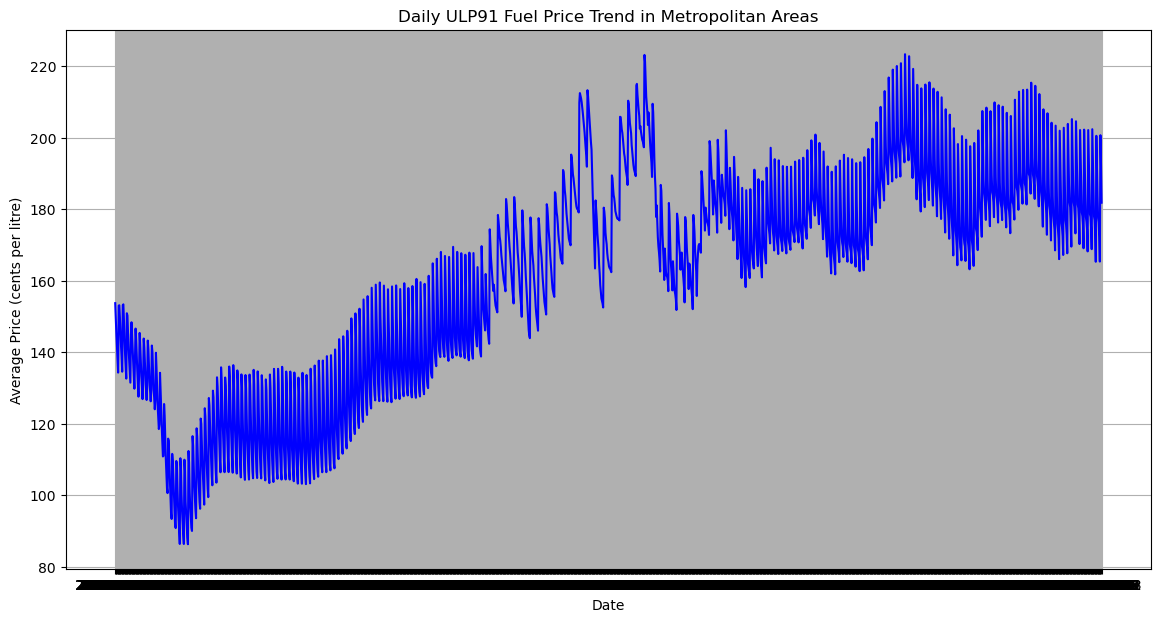

In [40]:
# Group the data by 'PUBLISH_DATE' column and calculate the mean price for each day
daily_price_trend = data_cleaned.groupby('PUBLISH_DATE')['PRODUCT_PRICE'].mean()

# Plot the daily price trend
plt.figure(figsize=(14, 7))
plt.plot(daily_price_trend.index, daily_price_trend, color='blue')
plt.title('Daily ULP91 Fuel Price Trend in Metropolitan Areas')
plt.xlabel('Date')
plt.ylabel('Average Price (cents per litre)')
plt.grid(True)
plt.show()


# Weekly Trend

C:\Users\User\AppData\Local\Temp\ipykernel_37644\1784255891.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price_trend = daily_price_trend.resample('M').mean()


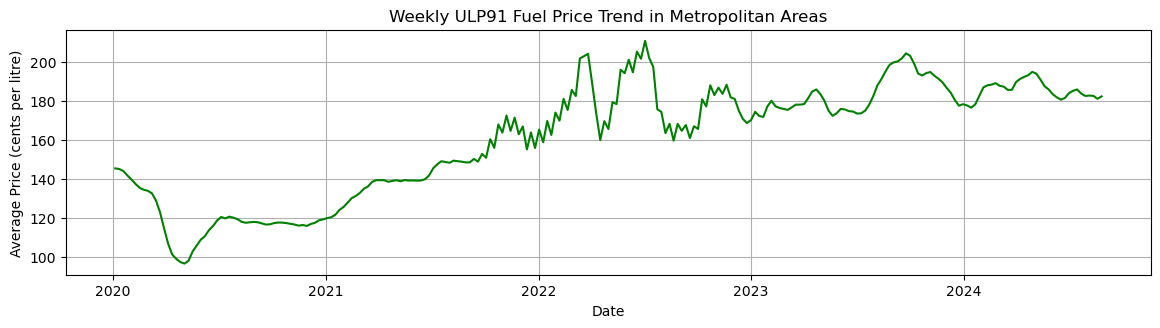

In [41]:
# 'PUBLISH_DATE' is in datetime format before proceeding
data_cleaned['PUBLISH_DATE'] = pd.to_datetime(data_cleaned['PUBLISH_DATE'], errors='coerce')

# Group the data by the 'PUBLISH_DATE' column and calculate the mean price for each day
daily_price_trend = data_cleaned.groupby('PUBLISH_DATE')['PRODUCT_PRICE'].mean()

# Check if 'PUBLISH_DATE' is the index and in datetime format
if not pd.api.types.is_datetime64_any_dtype(daily_price_trend.index):
    print("PUBLISH_DATE is not in datetime format or not set as index correctly.")

# Resample the data to get weekly and monthly averages
weekly_price_trend = daily_price_trend.resample('W').mean()
monthly_price_trend = daily_price_trend.resample('M').mean()

# Plotting the weekly trends
plt.figure(figsize=(14, 7))

# Weekly trend
plt.subplot(2, 1, 1)
plt.plot(weekly_price_trend.index, weekly_price_trend.values, color='green')
plt.title('Weekly ULP91 Fuel Price Trend in Metropolitan Areas')
plt.xlabel('Date')
plt.ylabel('Average Price (cents per litre)')
plt.grid(True)



# Monthly Trend

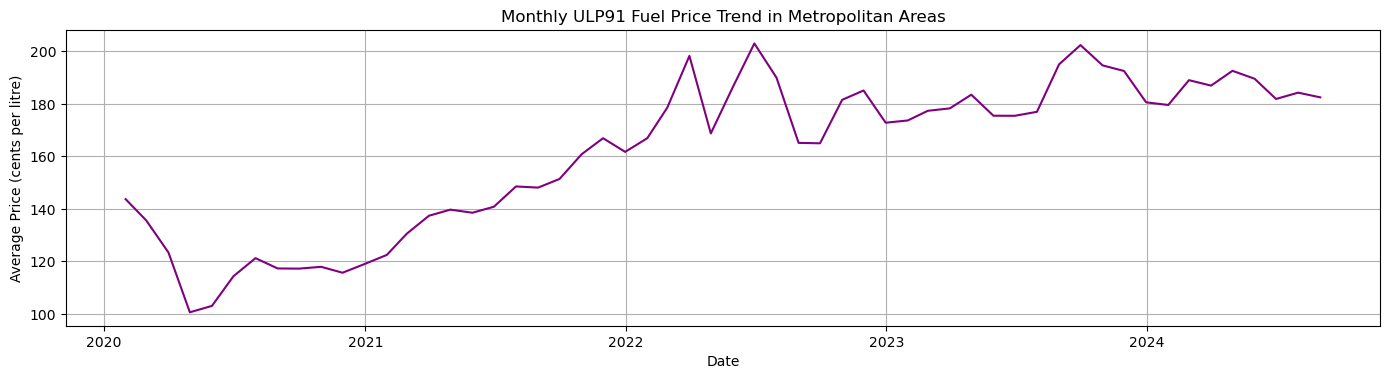

In [42]:
# Monthly trend

# Plotting monthly trends
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 2)
plt.plot(monthly_price_trend.index, monthly_price_trend.values, color='purple')
plt.title('Monthly ULP91 Fuel Price Trend in Metropolitan Areas')
plt.xlabel('Date')
plt.ylabel('Average Price (cents per litre)')
plt.grid(True)

plt.tight_layout()
plt.show()


# Monthly Trend for Max, Min, Median, and Averages

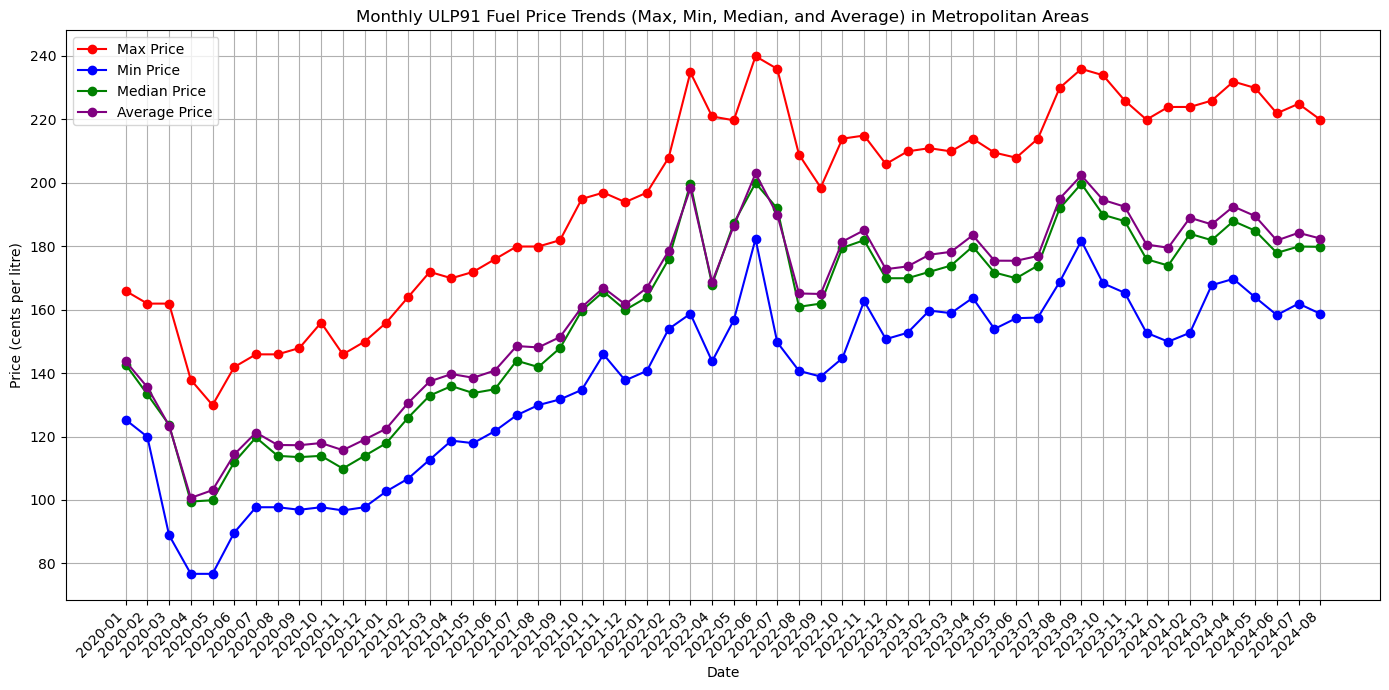

In [43]:
#'PUBLISH_DATE' is in datetime format
data_cleaned['PUBLISH_DATE'] = pd.to_datetime(data_cleaned['PUBLISH_DATE'])

# Group the data by month and calculate the min, max, median, and average price for each month
data_cleaned['Month'] = data_cleaned['PUBLISH_DATE'].dt.to_period('M')

monthly_price_min = data_cleaned.groupby('Month')['PRODUCT_PRICE'].min()
monthly_price_max = data_cleaned.groupby('Month')['PRODUCT_PRICE'].max()
monthly_price_median = data_cleaned.groupby('Month')['PRODUCT_PRICE'].median()
monthly_price_avg = data_cleaned.groupby('Month')['PRODUCT_PRICE'].mean()

# Plotting the monthly min, max, median, and average trends
plt.figure(figsize=(14, 7))

# Max trend
plt.plot(monthly_price_max.index.astype(str), monthly_price_max.values, label='Max Price', color='red', marker='o')

# Min trend
plt.plot(monthly_price_min.index.astype(str), monthly_price_min.values, label='Min Price', color='blue', marker='o')

# Median trend
plt.plot(monthly_price_median.index.astype(str), monthly_price_median.values, label='Median Price', color='green', marker='o')

# Average trend
plt.plot(monthly_price_avg.index.astype(str), monthly_price_avg.values, label='Average Price', color='purple', marker='o')

# Add titles and labels
plt.title('Monthly ULP91 Fuel Price Trends (Max, Min, Median, and Average) in Metropolitan Areas')
plt.xlabel('Date')
plt.ylabel('Price (cents per litre)')
plt.grid(True)

# Rotate x-axis labels and format ticks
plt.xticks(rotation=45, ha='right')

# Add a legend to differentiate between max, min, median, and average
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent label clipping
plt.show()


# Trend Decomposition

C:\Users\User\AppData\Local\Temp\ipykernel_37644\1517062829.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_price_trend.fillna(method='ffill', inplace=True)


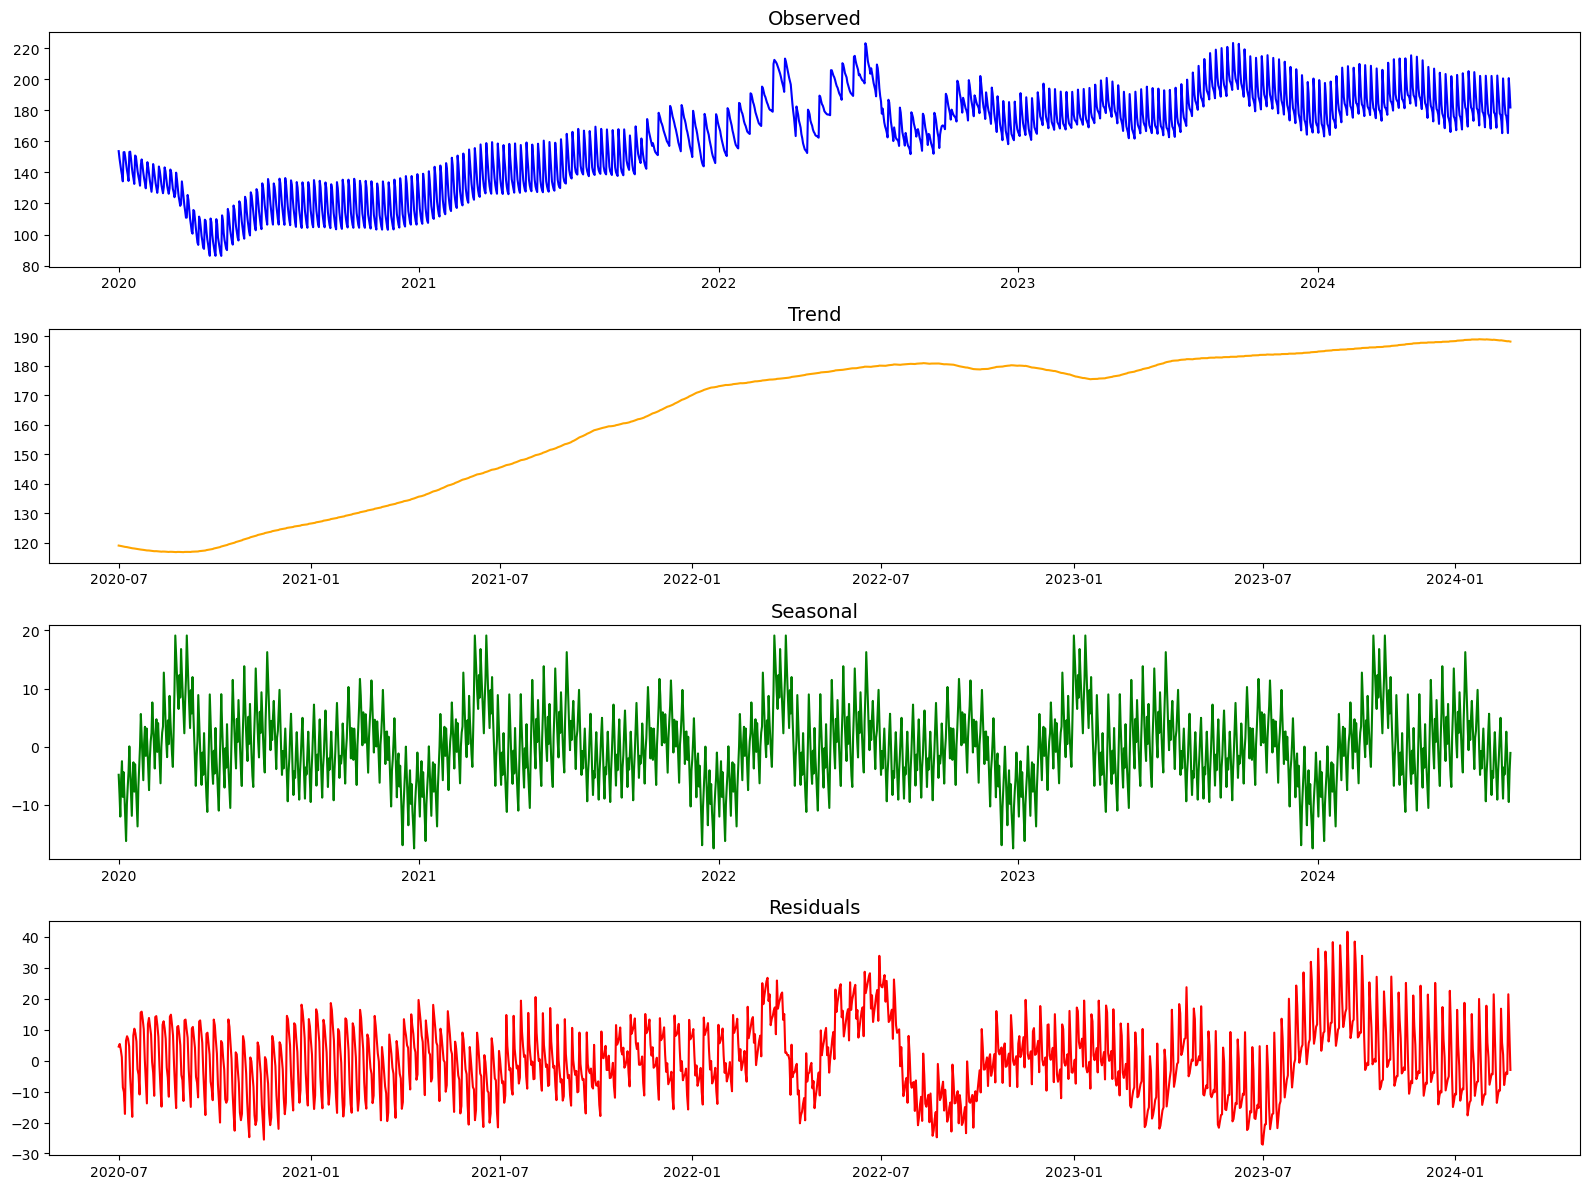

In [44]:

# Ensure that the data contains only numeric values
daily_price_trend = pd.to_numeric(daily_price_trend, errors='coerce')

# Handle missing or NaN values by filling them (e.g., with interpolation)
daily_price_trend.fillna(method='ffill', inplace=True)

# Decompose the time series data into trend, seasonal, and residual components
decomposition = seasonal_decompose(daily_price_trend, model='additive', period=365)

# Plotting the decomposed components individually for better control over size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12))  # Increase figure size

# Plot observed data
ax1.plot(decomposition.observed, label='Observed', color='blue')
ax1.set_title('Observed', fontsize=14)

# Plot trend
ax2.plot(decomposition.trend, label='Trend', color='orange')
ax2.set_title('Trend', fontsize=14)

# Plot seasonality
ax3.plot(decomposition.seasonal, label='Seasonal', color='green')
ax3.set_title('Seasonal', fontsize=14)

# Plot residuals
ax4.plot(decomposition.resid, label='Residuals', color='red')
ax4.set_title('Residuals', fontsize=14)

# Adjust layout and show
plt.tight_layout()
plt.show()




1. Observed:
What it shows: This is your original PRODUCT_PRICE series, showing the daily fuel prices over time.
Key Insights:
There is a noticeable upward trend from mid-2020 to early 2022, where the prices steadily increased.
Around mid-2022, there's a sharp spike followed by a drop. This spike could be related to an external factor (e.g., global oil price fluctuations, inflation, or specific events).
The regular oscillations visible throughout the series suggest strong seasonality, possibly related to weekly price cycles or other cyclic behavior.
2. Trend:
What it shows: This component smooths out the short-term fluctuations to show the long-term price trend.
Key Insights:
The price of ULP91 fuel has been steadily increasing from mid-2020 to mid-2022.
Around the second half of 2022, the trend flattens, indicating that after a sharp increase, fuel prices may have stabilized somewhat.
There is no significant downward trend, which could suggest that fuel prices are likely to remain relatively high unless influenced by external factors.
3. Seasonal:
What it shows: This represents the repeating patterns (seasonality) in the fuel price data. It captures regular fluctuations that occur over a period (e.g., weekly, monthly, or yearly cycles).
Key Insights:
The seasonal component shows consistent, repeating peaks and troughs, suggesting strong cyclic behavior in fuel prices.
The periodicity suggests a weekly cycle, which aligns with typical fuel price changes, where prices tend to spike and fall during certain days of the week (e.g., prices are often higher on weekends or specific weekdays).
The amplitude (height) of the seasonality seems relatively stable, indicating that the magnitude of weekly price fluctuations is consistent across time.
4. Residuals:
What it shows: This is the random noise left after removing the trend and seasonal components. It captures unexpected variations or anomalies in the data.
Key Insights:
The residuals are fairly random, but there are some periods where the variance (spread) increases, particularly around mid-2022.
This increase in residual variance suggests that there may have been certain events during that period that caused price changes that couldn't be explained by the trend or seasonality (e.g., supply chain disruptions, unexpected changes in demand, geopolitical events).
Apart from these spikes, the residuals don’t exhibit strong patterns, meaning most of the variability in the data has been captured by the trend and seasonal components.


# Data Statistics Visualized

In [45]:
daily_price_trend = pd.to_numeric(daily_price_trend, errors='coerce')


daily_price_trend.fillna(method='ffill', inplace=True)

if isinstance(daily_price_trend, pd.Series):
    # Calculating summary statistics for daily price trends
    summary_stats = daily_price_trend.describe(percentiles=[.25, .5, .75])

    # Additional statistics
    median_price = daily_price_trend.median()
    min_price = daily_price_trend.min()
    max_price = daily_price_trend.max()

    # Print out the summary stats
    print("Summary Statistics for Daily Prices:")
    print(summary_stats)
    print(f"Median Price: {median_price}")
    print(f"Minimum Price: {min_price}")
    print(f"Maximum Price: {max_price}")
else:
    print("Error: daily_price_trend is not a pandas Series.")


Summary Statistics for Daily Prices:
count    1697.000000
mean      161.109203
std        30.483487
min        86.258456
25%       135.900355
50%       168.282261
75%       183.706656
max       223.339219
Name: PRODUCT_PRICE, dtype: float64
Median Price: 168.28226086956522
Minimum Price: 86.25845588235295
Maximum Price: 223.33921901528012


C:\Users\User\AppData\Local\Temp\ipykernel_37644\2532720915.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_price_trend.fillna(method='ffill', inplace=True)


The fuel prices in this data show a moderate variability (std = 30.48), indicating that while prices tend to fluctuate, they generally stay within a consistent range.
The median price is slightly higher than the mean, suggesting that the distribution of prices might be right-skewed, meaning there were more frequent lower prices but a few very high prices that pushed the average up.
The max price of 223.34 cents is an outlier compared to the mean and median. This might have been caused by specific market conditions (e.g., supply disruptions, spikes in demand).

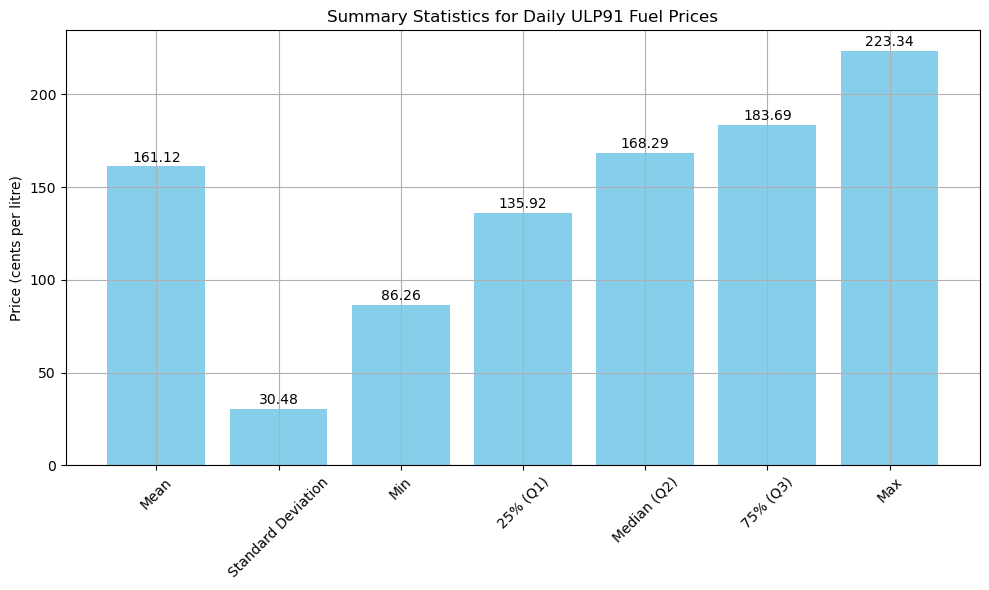

In [46]:
# Data for the summary statistics
summary_stats = {
    'Mean': 161.12,
    'Standard Deviation': 30.48,
    'Min': 86.26,
    '25% (Q1)': 135.92,
    'Median (Q2)': 168.29,
    '75% (Q3)': 183.69,
    'Max': 223.34
}

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(summary_stats.keys(), summary_stats.values(), color='skyblue')

# Add labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.title('Summary Statistics for Daily ULP91 Fuel Prices')
plt.ylabel('Price (cents per litre)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Daily Fuel Price : Box Plot

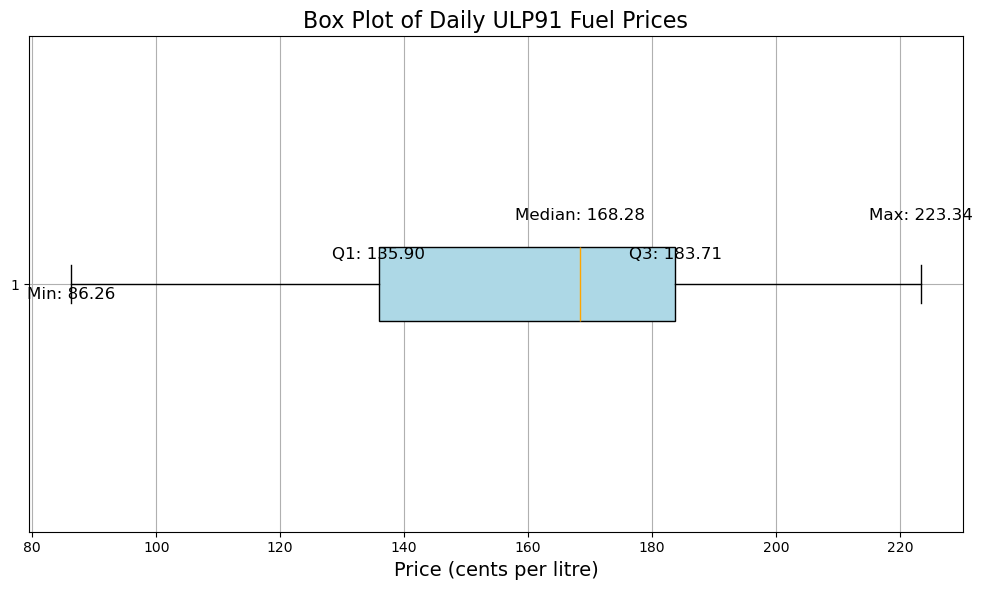

In [47]:
plt.figure(figsize=(10, 6))
box = plt.boxplot(daily_price_trend, vert=False, patch_artist=True, 
                  boxprops=dict(facecolor='lightblue'), medianprops=dict(color='orange'))

# Add labels for the box plot (min, Q1, median, Q3, max)
quartiles = [np.min(daily_price_trend), np.percentile(daily_price_trend, 25), np.median(daily_price_trend), 
             np.percentile(daily_price_trend, 75), np.max(daily_price_trend)]
quartile_labels = ['Min', 'Q1', 'Median', 'Q3', 'Max']


positions = [-8, 0, 8, 0, 8]  # Adjust vertical positions to prevent overlapping
for i, value in enumerate(quartiles):
    plt.text(value, 1.05 + (positions[i] / 100), f'{quartile_labels[i]}: {value:.2f}', ha='center', fontsize=12)

plt.title('Box Plot of Daily ULP91 Fuel Prices', fontsize=16)
plt.xlabel('Price (cents per litre)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


# Daily Fuel Price Distribution 

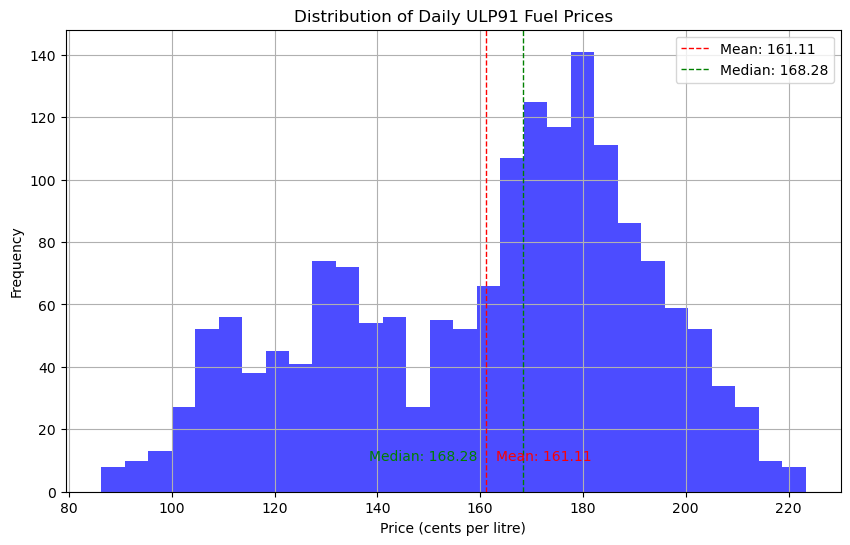

In [48]:
# Create a histogram to show the distribution of daily prices
plt.figure(figsize=(10, 6))
plt.hist(daily_price_trend, bins=30, color='blue', alpha=0.7)

# Add lines for mean and median
mean_val = np.mean(daily_price_trend)
median_val = np.median(daily_price_trend)

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f"Median: {median_val:.2f}")

# Add text labels for the mean and median
plt.text(mean_val + 2, 10, f'Mean: {mean_val:.2f}', color='red')
plt.text(median_val - 30, 10, f'Median: {median_val:.2f}', color='green')

plt.title('Distribution of Daily ULP91 Fuel Prices')
plt.xlabel('Price (cents per litre)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


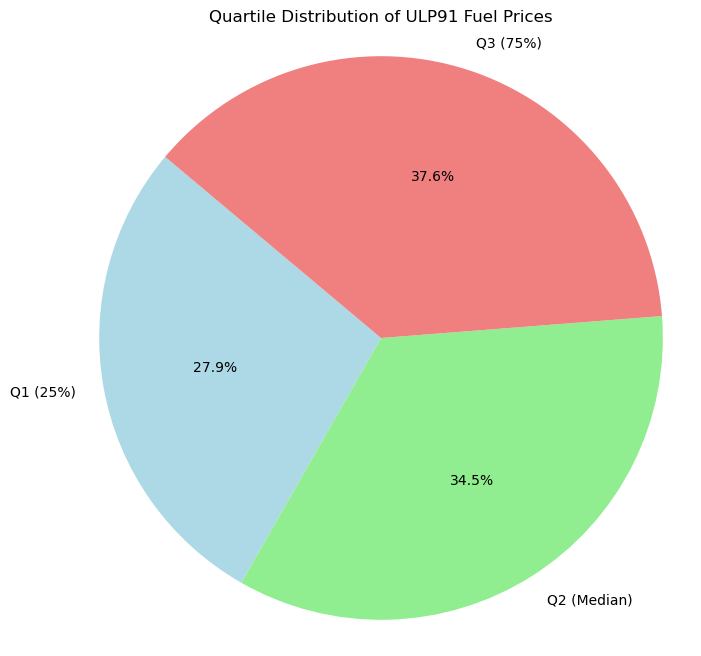

In [49]:
# Data for the quartile distribution
quartile_data = [summary_stats['25% (Q1)'], summary_stats['Median (Q2)'], summary_stats['75% (Q3)']]
quartile_labels = ['Q1 (25%)', 'Q2 (Median)', 'Q3 (75%)']

# Create a pie chart to show the distribution of the quartiles
plt.figure(figsize=(8, 8))
plt.pie(quartile_data, labels=quartile_labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=140)
plt.title('Quartile Distribution of ULP91 Fuel Prices')
plt.axis('equal')  
plt.show()


# Weekday Analysis
### 	Hypothesis : Different days have different prices 

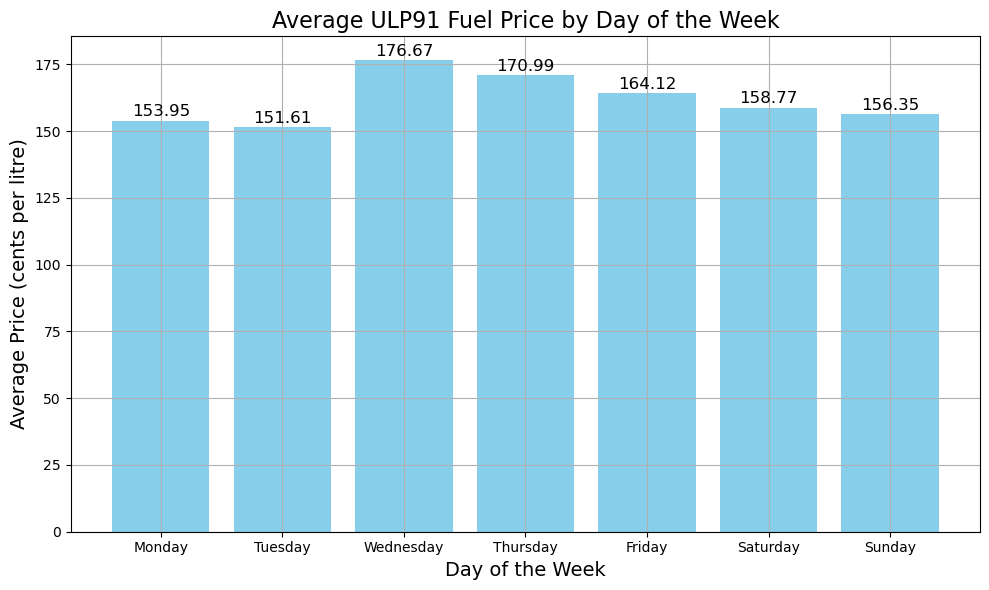

Day_of_Week_Name
Monday       153.950192
Tuesday      151.612925
Wednesday    176.668889
Thursday     170.992779
Friday       164.123074
Saturday     158.769591
Sunday       156.354133
Name: PRODUCT_PRICE, dtype: float64

In [ ]:
# Add a column for the day of the week
data_cleaned['Day_of_Week'] = data_cleaned['PUBLISH_DATE'].dt.dayofweek

# Map numeric values to actual weekday names for clarity
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data_cleaned['Day_of_Week_Name'] = data_cleaned['Day_of_Week'].map(day_mapping)

# Group by the 'Day_of_Week_Name' and calculate the mean fuel price for each day
weekly_price_stats = data_cleaned.groupby('Day_of_Week_Name')['PRODUCT_PRICE'].mean().reindex(day_mapping.values())

# Plotting the average fuel price for each day of the week with labels
plt.figure(figsize=(10, 6))
bars = plt.bar(weekly_price_stats.index, weekly_price_stats.values, color='skyblue')

# Add labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.title('Average ULP91 Fuel Price by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Price (cents per litre)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the statistics for each day of the week
weekly_price_stats


## Weekly Mean Averages

In [ ]:
data_cleaned['PUBLISH_DATE'] = pd.to_datetime(data_cleaned['PUBLISH_DATE'])
data_cleaned['DayOfWeek'] = data_cleaned['PUBLISH_DATE'].dt.day_name()
data_cleaned['Year'] = data_cleaned['PUBLISH_DATE'].dt.year

# List of days to plot
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Colors for the days
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink']

# Create a function to calculate and plot the average prices for all days in the selected year
def plot_all_days_avg(selected_year):
    plt.figure(figsize=(10, 6))
    
    # Filter by selected year, or include all years if 'All' is selected
    if selected_year != 'All':
        df_filtered = data_cleaned.loc[data_cleaned['Year'] == selected_year]
    else:
        df_filtered = data_cleaned.copy()
    
    # Loop through each day and calculate the weekly average
    for i, day in enumerate(days_of_week):
        day_filtered = df_filtered.loc[df_filtered['DayOfWeek'] == day].copy()
        day_filtered['Week_Number'] = day_filtered['PUBLISH_DATE'].dt.isocalendar().week
        
        # Calculate weekly average
        weekly_avg = day_filtered.groupby('Week_Number')['PRODUCT_PRICE'].mean()
        
        # Plot the day of the week with a different color
        plt.plot(weekly_avg.index, weekly_avg.values, marker='o', color=colors[i], label=day)
    
    plt.title(f'Average Fuel Prices by Day of the Week ({selected_year})')
    plt.xlabel('Week Number')
    plt.ylabel('Average Fuel Price (cents)')
    plt.grid(True)
    plt.legend(title="Day of the Week")
    plt.show()

# Create dropdown widget for year selection
year_dropdown = widgets.Dropdown(
    options=['All'] + sorted(data_cleaned['Year'].unique().tolist()),
    value='All',
    description='Select Year:'
)

# Create an output widget for the plot
output = widgets.Output()

# Function to update the plot based on the selected year
def update_plot(change):
    with output:
        output.clear_output()  # Clear previous output
        plot_all_days_avg(year_dropdown.value)

# Attach the callback function to the year dropdown
year_dropdown.observe(update_plot, names='value')

# Display the dropdown and the plot
display(year_dropdown, output)

# Trigger the first plot manually
with output:
    plot_all_days_avg(year_dropdown.value)

Dropdown(description='Select Year:', options=('All', 2020, 2021, 2022, 2023, 2024), value='All')

Output()

## Weekly Median Values

In [53]:
# Ensure PUBLISH_DATE is datetime and extract necessary components
data_cleaned['PUBLISH_DATE'] = pd.to_datetime(data_cleaned['PUBLISH_DATE'])
data_cleaned['DayOfWeek'] = data_cleaned['PUBLISH_DATE'].dt.day_name()
data_cleaned['Year'] = data_cleaned['PUBLISH_DATE'].dt.year

# List of days to plot
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Colors for the days
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink']

# Create a function to calculate and plot the median prices for all days in the selected year
def plot_all_days_median(selected_year):
    plt.figure(figsize=(10, 6))
    
    # Filter by selected year, or include all years if 'All' is selected
    if selected_year != 'All':
        df_filtered = data_cleaned.loc[data_cleaned['Year'] == selected_year]
    else:
        df_filtered = data_cleaned.copy()
    
    # Loop through each day and calculate the weekly median
    for i, day in enumerate(days_of_week):
        day_filtered = df_filtered.loc[df_filtered['DayOfWeek'] == day].copy()
        day_filtered['Week_Number'] = day_filtered['PUBLISH_DATE'].dt.isocalendar().week
        
        # Calculate weekly median
        weekly_median = day_filtered.groupby('Week_Number')['PRODUCT_PRICE'].median()
        
        # Plot the day of the week with a different color
        plt.plot(weekly_median.index, weekly_median.values, marker='o', color=colors[i], label=day)
    
    plt.title(f'Median Fuel Prices by Day of the Week ({selected_year})')
    plt.xlabel('Week Number')
    plt.ylabel('Median Fuel Price (cents)')
    plt.grid(True)
    plt.legend(title="Day of the Week")
    plt.show()

# Create dropdown widget for year selection
year_dropdown = widgets.Dropdown(
    options=['All'] + sorted(data_cleaned['Year'].unique().tolist()),
    value='All',
    description='Select Year:'
)

# Create an output widget for the plot
output = widgets.Output()

# Function to update the plot based on the selected year
def update_plot(change):
    with output:
        output.clear_output()  # Clear previous output
        plot_all_days_median(year_dropdown.value)

# Attach the callback function to the year dropdown
year_dropdown.observe(update_plot, names='value')

# Display the dropdown and the plot
display(year_dropdown, output)

# Trigger the first plot manually
with output:
    plot_all_days_median(year_dropdown.value)


Dropdown(description='Select Year:', options=('All', 2020, 2021, 2022, 2023, 2024), value='All')

Output()

 This graph shows the median fuel price for each week is shown by day of the week.

C:\Users\User\AppData\Local\Temp\ipykernel_37644\2698099627.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DayOfWeek'] = df_filtered['PUBLISH_DATE'].dt.day_name()


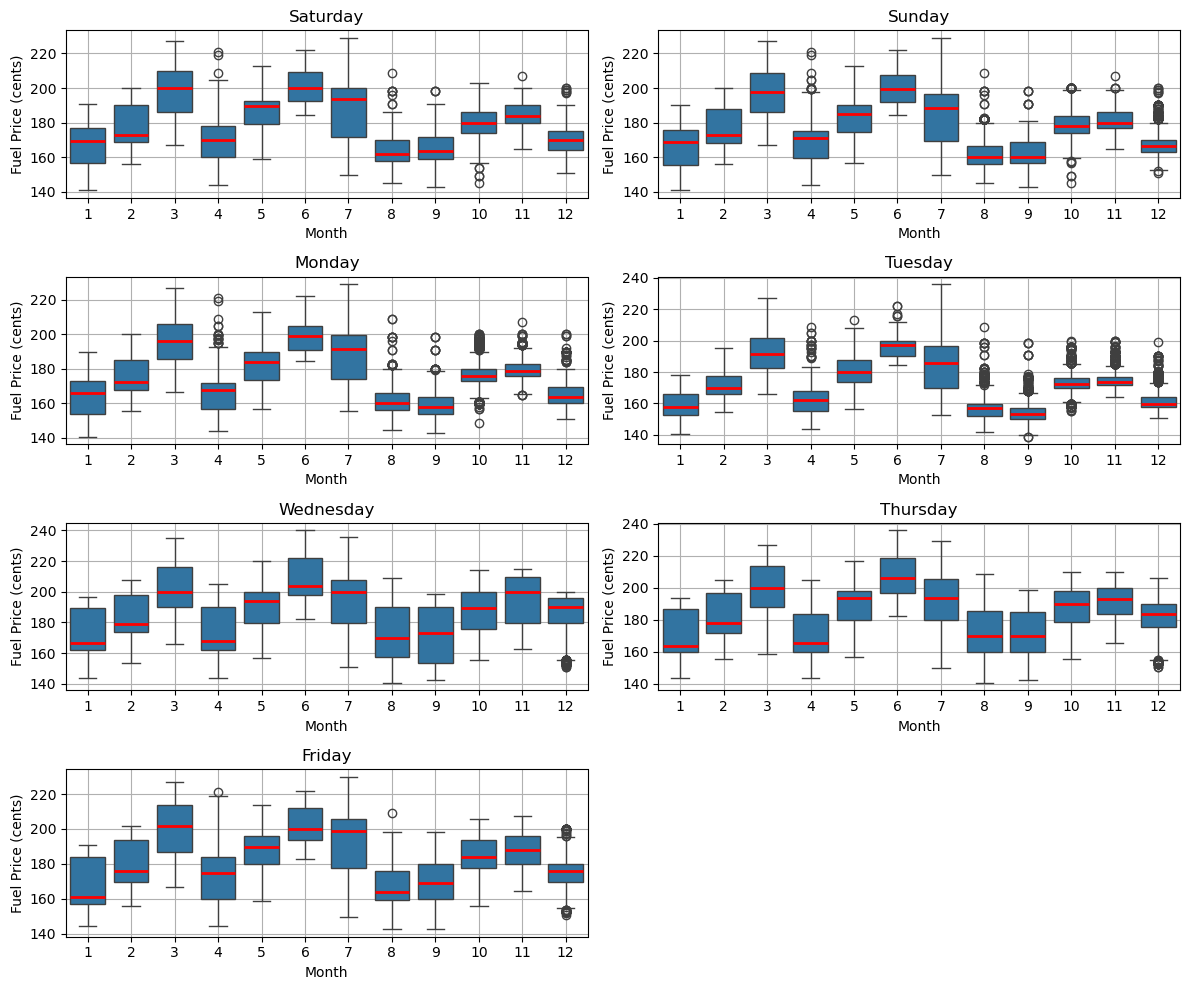

In [ ]:
def plot_boxplot_with_median(selected_year):
    # Ensure PUBLISH_DATE is datetime
    data_cleaned['PUBLISH_DATE'] = pd.to_datetime(data_cleaned['PUBLISH_DATE'], errors='coerce')

    # Extract the year and month from PUBLISH_DATE
    data_cleaned['Year'] = data_cleaned['PUBLISH_DATE'].dt.year
    data_cleaned['Month'] = data_cleaned['PUBLISH_DATE'].dt.month

    # Filter the data based on the selected year
    if selected_year != 'All':
        df_filtered = data_cleaned.loc[data_cleaned['Year'] == int(selected_year)]
    else:
        df_filtered = data_cleaned.copy()

    # Ensure the 'DayOfWeek' column exists
    df_filtered['DayOfWeek'] = df_filtered['PUBLISH_DATE'].dt.day_name()

    # Plot the boxplots as subplots for each day of the week
    plt.figure(figsize=(12, 10))
    days = df_filtered['DayOfWeek'].unique()

    for i, day in enumerate(days):
        plt.subplot(4, 2, i + 1)
        sns.boxplot(x='Month', y='PRODUCT_PRICE', data=df_filtered[df_filtered['DayOfWeek'] == day],
                    showfliers=True,  # Keep the outliers
                    medianprops={'color': 'red', 'linewidth': 2})  # Make median line prominent
        plt.title(day)
        plt.xlabel('Month')
        plt.ylabel('Fuel Price (cents)')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example of calling the function
plot_boxplot_with_median('2022')


Overall Trends:
There is clear price variation across different months. For most days, prices appear to rise between March and July, with a drop around October to December.
May to July seems to be a period where prices are generally higher, as reflected in the higher medians and upper quartiles across several days.

Day-to-Day Comparison:
Thursday consistently has higher prices compared to other days, particularly during the first half of the year.
Tuesday and Wednesday have more stable price ranges, with fewer outliers compared to other days like Saturday and Sunday.

Outliers:
There are noticeable outliers in months like June, July, and August, where prices spike for certain days (like Saturday and Sunday).
Sundays show significant outliers, especially in May and June.

Weekend vs Weekday:
The prices for Saturday and Sunday show more variability compared to weekdays. This could suggest that prices fluctuate more on weekends due to demand patterns or pricing strategies.